In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import sys
from importlib import reload

In [6]:
sys.path.append("../../src")
import main
import vis

In [7]:
wind = pd.read_csv('/Users/lisawink/Documents/paper1/data/raw_data/Freiburg_Dach_2022-09-01_2023-09-01.csv')

In [8]:
wind['UTC'] = pd.to_datetime(wind['UTC'], format='%d.%m.%y %H:%M', utc=True)

In [9]:
wind[wind['UTC'] == '2023-08-09 03:00:00+00:00']

UTC       Lokalzeit  Lufttemperatur (°C)  \
8194 2023-08-09 03:00:00+00:00  09.08.23 05:00             18.46777   

      Relative Luftfeuchtigkeit (%)  Dampfdruck (hPa)  \
8194                       53.48522          11.22091   

      Windgeschwindigkeit Dach (m/s)  Windgeschwindigkeit Dach (m/s).1  \
8194                        3.224746                           5.85554   

      Windrichtung Dach (°)  Globalstrahlung (W/m²)  Sichtweite (km)  \
8194               169.1096                     0.0             75.0   

      Niederschlag (mm)  
8194                0.0

In [10]:
wind['UTC'].dt.date[8200]

datetime.date(2023, 8, 9)

In [11]:
wind[wind['UTC'].dt.date == wind['UTC'].dt.date[8200]]

UTC       Lokalzeit  Lufttemperatur (°C)  \
8191 2023-08-09 00:00:00+00:00  09.08.23 02:00             18.27140   
8192 2023-08-09 01:00:00+00:00  09.08.23 03:00             18.55152   
8193 2023-08-09 02:00:00+00:00  09.08.23 04:00             18.77752   
8194 2023-08-09 03:00:00+00:00  09.08.23 05:00             18.46777   
8195 2023-08-09 04:00:00+00:00  09.08.23 06:00             18.59396   
8196 2023-08-09 05:00:00+00:00  09.08.23 07:00             18.53827   
8197 2023-08-09 06:00:00+00:00  09.08.23 08:00             18.64199   
8198 2023-08-09 07:00:00+00:00  09.08.23 09:00             17.88501   
8199 2023-08-09 08:00:00+00:00  09.08.23 10:00             18.06040   
8200 2023-08-09 09:00:00+00:00  09.08.23 11:00             18.71748   
8201 2023-08-09 10:00:00+00:00  09.08.23 12:00             19.61285   
8202 2023-08-09 11:00:00+00:00  09.08.23 13:00             20.29425   
8203 2023-08-09 12:00:00+00:00  09.08.23 14:00             20.85362   
8204 2023-08-09 13:00:00+00:00  09.08.23 15:00             21.33830   
8205 2023-08-09 14:00:00+00:00  09.08.23 16:00             21.59957   
8206 2023-08-09 15:00:00+00:00  09.08.23 17:00             21.26908   
8207 2023-08-09 16:00:00+00:00  09.08.23 18:00             21.24464   
8208 2023-08-09 17:00:00+00:00  09.08.23 19:00             21.36038   
8209 2023-08-09 18:00:00+00:00  09.08.23 20:00             21.33000   
8210 2023-08-09 19:00:00+00:00  09.08.23 21:00             20.48673   
8211 2023-08-09 20:00:00+00:00  09.08.23 22:00             19.41978   
8212 2023-08-09 21:00:00+00:00  09.08.23 23:00             18.62433   
8213 2023-08-09 22:00:00+00:00  10.08.23 00:00             18.06579   
8214 2023-08-09 23:00:00+00:00  10.08.23 01:00             17.95673   

      Relative Luftfeuchtigkeit (%)  Dampfdruck (hPa)  \
8191                       55.70490          11.54174   
8192                       54.26845          11.43982   
8193                       52.42884          11.20618   
8194                       53.48522          11.22091   
8195                       52.92474          11.18934   
8196                       53.84516          11.34537   
8197                       54.15409          11.48282   
8198                       60.15025          12.17331   
8199                       59.91212          12.25727   
8200                       57.81651          12.31726   
8201                       54.48648          12.25786   
8202                       52.63343          12.34348   
8203                       51.30739          12.44577   
8204                       50.91623          12.71615   
8205                       51.25503          12.99694   
8206                       54.60142          13.57934   
8207                       53.90768          13.38764   
8208                       55.81540          13.95914   
8209                       57.24433          14.28897   
8210                       62.85824          14.89700   
8211                       67.07337          14.91243   
8212                       69.82622          14.79057   
8213                       70.79014          14.48708   
8214                       70.02375          14.23329   

      Windgeschwindigkeit Dach (m/s)  Windgeschwindigkeit Dach (m/s).1  \
8191                        3.163867                           4.90790   
8192                        4.018904                           5.81978   
8193                        3.711442                           6.52604   
8194                        3.224746                           5.85554   
8195                        3.298365                           5.81084   
8196                        3.538130                           6.03434   
8197                        4.084389                           7.82234   
8198                        3.713603                           6.23996   
8199                        3.850956                           7.50944   
8200                        3.783161                           7.71506   
8201       

In [12]:
wind['quadrant'] = wind['Windrichtung Dach (°)'].apply(
    lambda x: 'NE' if x < 45 else 'E' if x < 90 else 'SE' if x < 135 else 'S' if x < 180 else 'SW' if x < 225 else 'W' if x < 270 else 'NW' if x < 315 else 'N'
)

In [13]:
quadrant_count = wind.groupby([wind['UTC'].dt.date,'quadrant']).agg({'quadrant': 'count'})

In [14]:
quadrant_count

quadrant
UTC        quadrant          
2022-09-01 E                4
           N                2
           NE               6
           NW               2
           SE               9
...                       ...
2023-09-01 NW               1
           S                1
           SE               4
           SW              14
           W                3

[1844 rows x 1 columns]

In [15]:
# select days where all wind qiadrants are the same

quadrant_count[quadrant_count['quadrant'] >20]

quadrant
UTC        quadrant          
2022-09-10 SW              24
2022-09-27 SW              23
2022-11-18 SW              23
2022-11-20 SW              24
2022-11-22 SW              24
2022-12-09 N               21
2022-12-15 N               22
2022-12-21 SW              22
2022-12-22 SW              23
2022-12-23 SW              24
2022-12-29 SW              21
2023-01-09 SW              24
2023-01-11 SW              23
2023-01-12 SW              24
2023-01-13 SW              22
2023-01-14 SW              22
2023-01-15 SW              21
2023-01-23 NE              22
2023-01-25 N               23
2023-02-01 SW              24
2023-02-02 SW              24
2023-02-03 SW              24
2023-02-17 SW              24
2023-02-18 SW              24
2023-02-26 NE              24
2023-03-07 SW              22
2023-03-08 SW              21
2023-03-09 SW              22
2023-03-24 SW              22
2023-03-25 SW              24
2023-04-01 SW              24
2023-04-09 SE              22
2023-05-10 SW              23
2023-05-19 NE              22
2023-06-02 N               22
2023-07-16 SW              21

In [ ]:
quadrants
occurences of wind fractions per daytime
sort by days with fraction more than 0.5 from NE 
fraction above threshold

In [16]:
# 9 Aug 170 deg

In [17]:
temp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
temp = temp[temp['variable']=='Ta_deg_C']

temp['datetime_UTC'] = temp['datetime_UTC'].astype(str)
temp = temp.pivot(index='station_id', columns='datetime_UTC', values='value')

In [18]:
radius = 300

In [19]:
# Define station IDs
stations = ['FRASHA', 'FRBETZ', 'FRBRUH', 'FRDREI', 'FRFRIE', 'FRGART', 'FRGLBA',
            'FRGUNT', 'FRHAID', 'FRHBHF', 'FRHERD', 'FRHOLZ', 'FRIHOC', 'FRINST',
            'FRKART', 'FRLAND', 'FRLORE', 'FRMESS', 'FROWIE', 'FRPDAS', 'FRRIES',
            'FRSEEP', 'FRSTGA', 'FRSTGE', 'FRSTUH', 'FRUNIK', 'FRUWIE', 'FRVAUB',
            'FRWEIN', 'FRWSEE', 'FRZAHR']

# Create a colormap (e.g., using the 'tab20' color palette)
cmap = plt.get_cmap('tab20', len(stations))  # 31 unique colors
station_colors = {station: cmap(i) for i, station in enumerate(stations)}  # Map station to color

In [20]:
daytime = '2023-08-09 03:00:00+00:00'

In [21]:
def plot_temp_circles(radius,time,var='BuVol_3D_sum'):
    vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
    vars.index = vars['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry']
    vars = vars.drop(to_remove, axis=1)
    df = vars.merge(temp, left_on='station_id', right_on='station_id',how='inner')

    lcz_colors = vis.define_lcz_colors()
    df['colors'] = [lcz_colors[station] for station in df.index]

    plt.figure(figsize=(10, 8))
    # in first 2 subplots plot temperature vs. BuVol3D_sum for daytime and nighttime
    plt.scatter(df[var], df[time], c=df['colors'])
    plt.title(f'Radius:{radius} Time:{time}', fontsize=16)
    plt.xlabel(var,fontsize=16)
    plt.ylabel('Temperature (°C)',fontsize=16)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=14)
    for i, txt in enumerate(df.index):
        plt.annotate(txt, (df[var].iloc[i], df[time].iloc[i]), fontsize=14, alpha=0.7)
    plt.show()

        # print r2 value
    df_nona = df.dropna(subset=[var, time])
    X = df_nona[[var]]
    y = df_nona[time]
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    print(f'R² value for {var} vs. {time}: {r2:.4f}')



In [39]:
plot_temp_circles(300,daytime)

R² value for BuVol_3D_sum vs. 2023-08-09 03:00:00+00:00: 0.0590


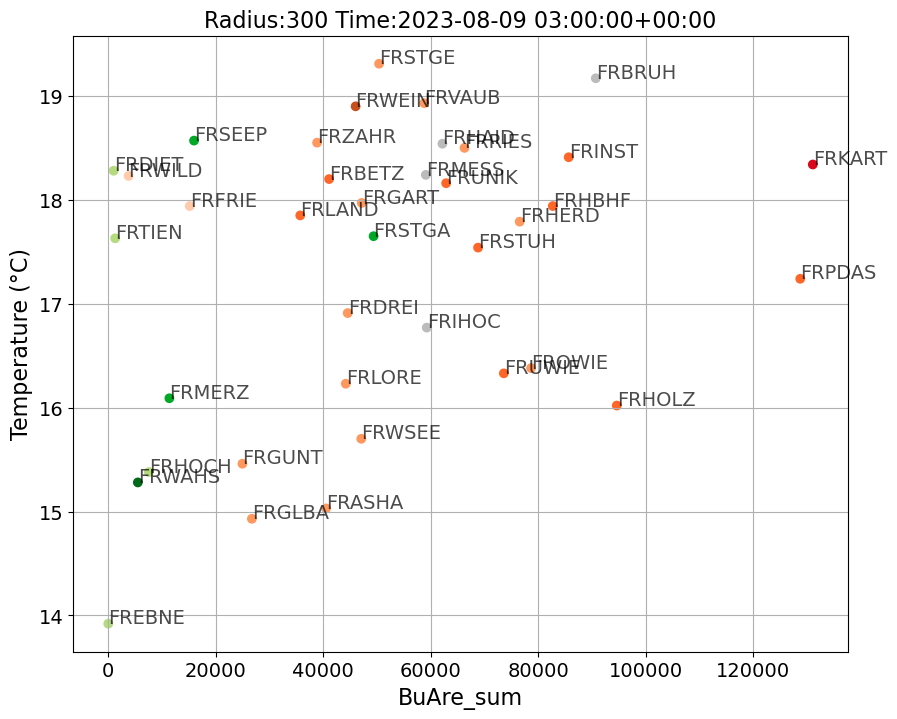

R² value for BuAre_sum vs. 2023-08-09 03:00:00+00:00: 0.0891


In [40]:
plot_temp_circles(300,daytime, var='BuAre_sum')

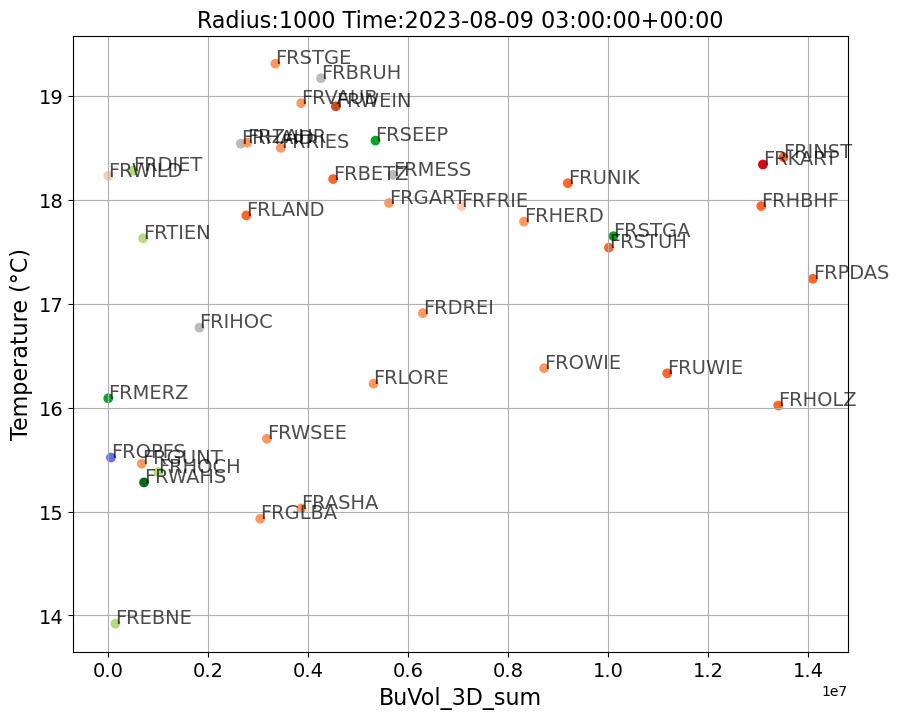

R² value for BuVol_3D_sum vs. 2023-08-09 03:00:00+00:00: 0.0536


In [22]:
plot_temp_circles(1000,daytime)

In [23]:
plot_temp_circles(2000,daytime)

R² value for BuVol_3D_sum vs. 2023-08-09 03:00:00+00:00: 0.0683


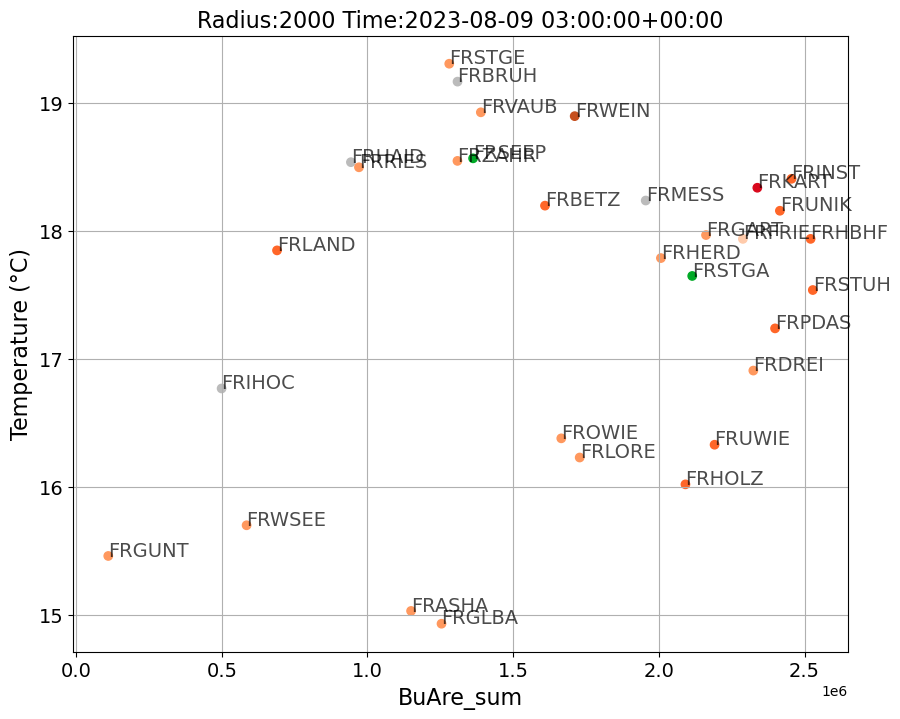

In [29]:
plot_temp_circles(2000,daytime,'BuAre_sum')

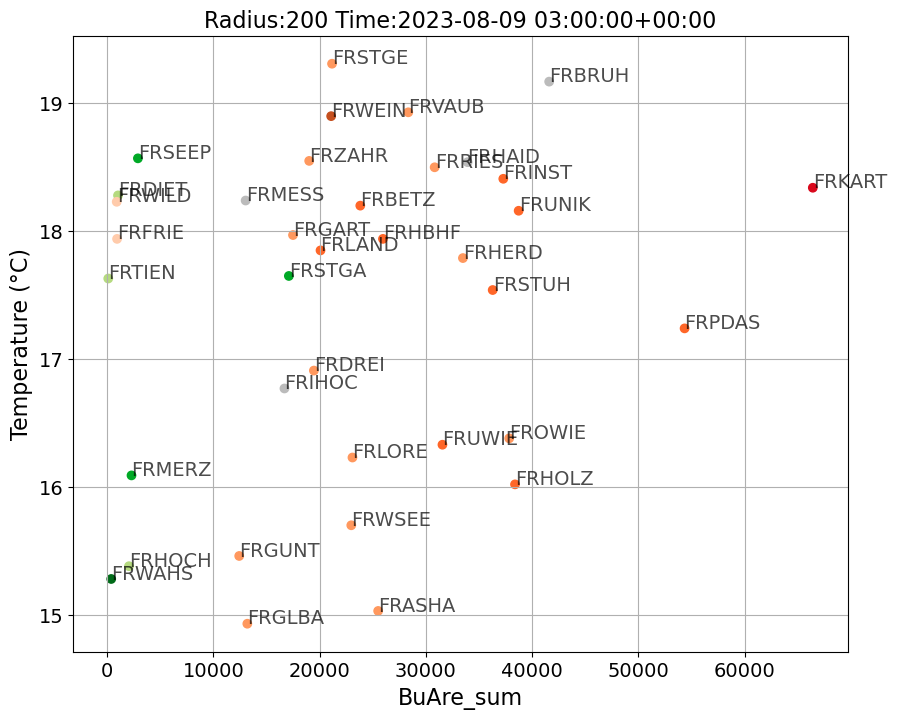

In [30]:
plot_temp_circles(200,daytime,'BuAre_sum')

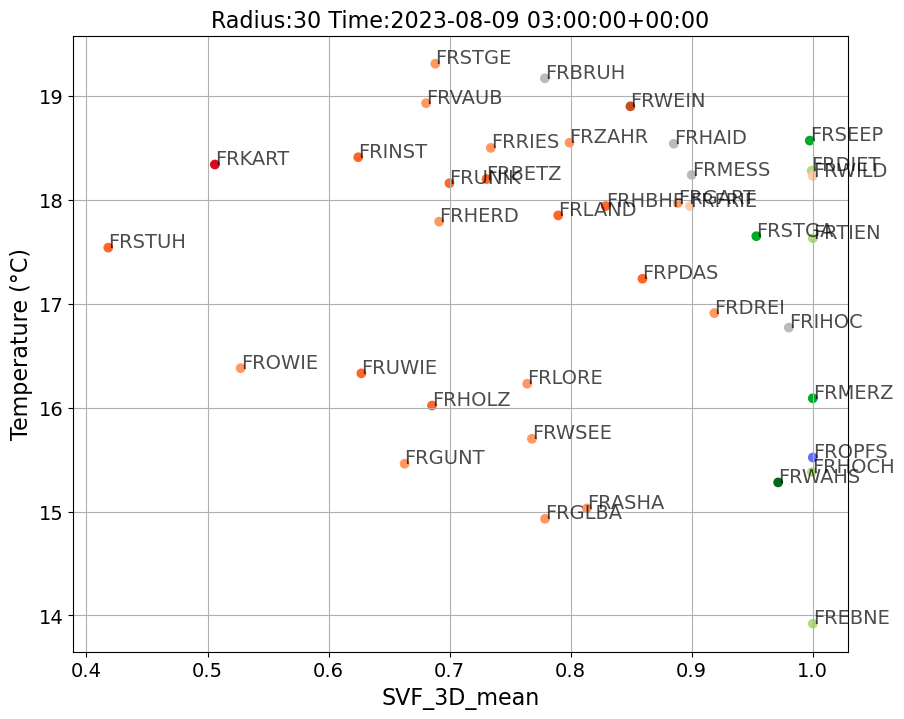

In [31]:
plot_temp_circles(30,daytime,var='SVF_3D_mean')

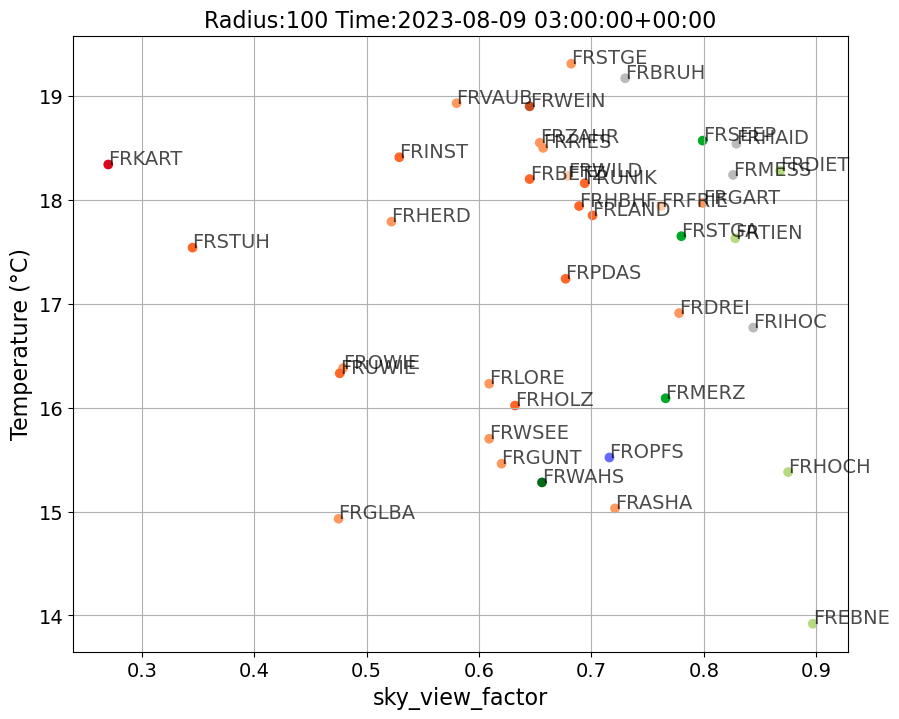

In [32]:
plot_temp_circles(100,daytime,var='sky_view_factor')

In [33]:
plot_temp_circles(100,daytime,var='BuHt_median')

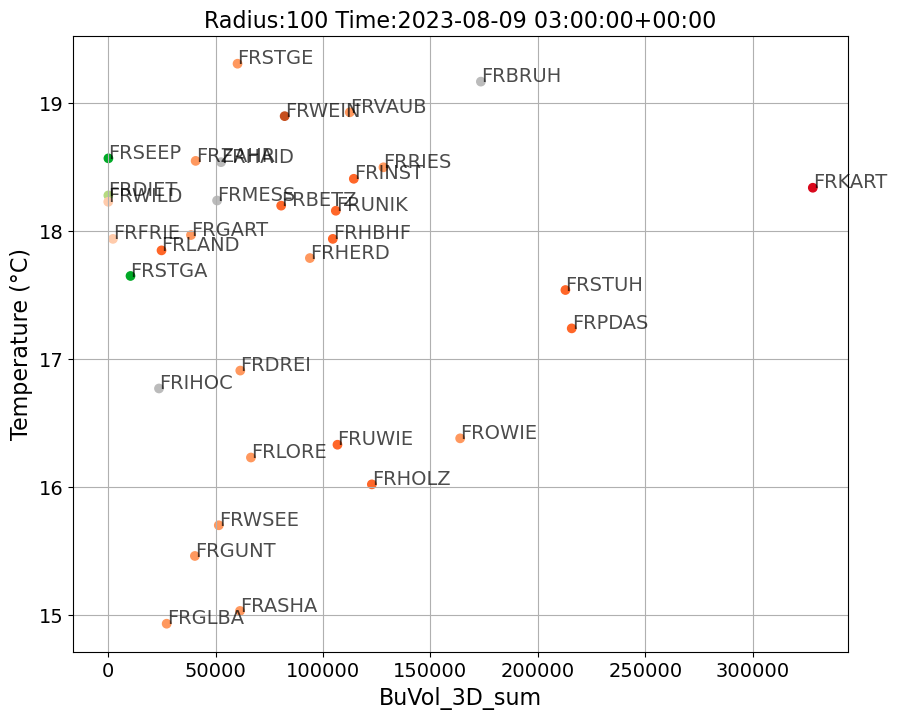

In [34]:
plot_temp_circles(100,daytime)

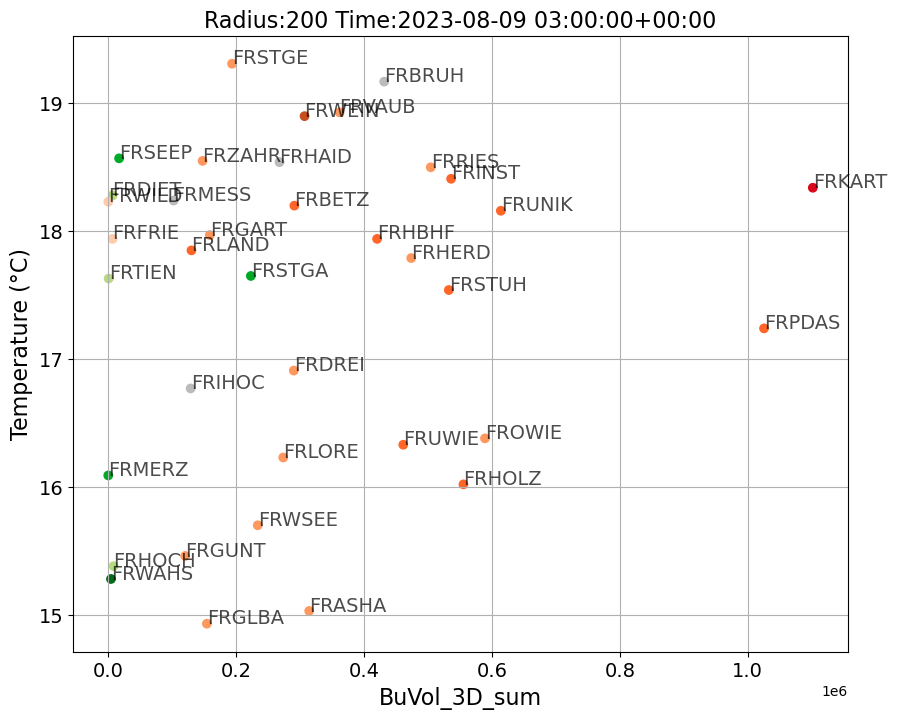

In [35]:
plot_temp_circles(200,daytime)

In [42]:
stations = pd.read_csv("/Users/lisawink/Documents/paper1/data/Freiburg-Street-Level-Weather-Station-Network-MetaData-V1-0.csv")

In [43]:
stations['station_elevation_diff'] = stations['station_elevation'] - stations[stations['station_id'] == 'FRHBHF']['station_elevation'].values[0]
stations = stations[stations['station_elevation_diff'] < 100]

In [44]:
reload(main)

<module 'main' from '/Users/lisawink/Documents/freiburg/src/main.py'>

In [51]:
i = 500
compass_angle=170

In [52]:
pies = main.convert_to_pie(stations, input_crs='EPSG:4326', output_crs='EPSG:31468', lat_column = 'station_lat', lon_column = 'station_lon', radius=i, compass_angle=compass_angle, angle_width=60)

In [53]:
pies.explore()

In [54]:
bldgs = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_buildings_3D.parquet')
streets = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_streets.parquet')
nodes = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_nodes.parquet')

In [55]:
stn_buffers = pies

In [56]:
stn_buffers = main.neighbourhood_graph_params(bldgs, stn_buffers)
b,s,n = main.select_objects(bldgs, streets, nodes, stn_buffers)
stn_buffers = main.aggregate_params(b,s,n, stn_buffers)

masked_svf_path = '/Users/lisawink/Documents/paper1/data/processed_data/SVF_street_buildings_only.tif'
stn_buffers = main.agg_raster(masked_svf_path, stn_buffers, 'SVF_3D')
stn_buffers.to_parquet('/Users/lisawink/Documents/paper1/data/processed_data/pies/processed_station_params_' + str(i) + '_' + str(compass_angle) + 'deg.parquet')

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py

In [57]:
def plot_temp_pies(radius,compass_angle,time,var='BuVol_3D_sum'):
    vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/pies/processed_station_params_' + str(radius) + '_' + str(compass_angle) + 'deg.parquet')
    vars.index = vars['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry']
    vars = vars.drop(to_remove, axis=1)
    df = vars.merge(temp, left_on='station_id', right_on='station_id',how='inner')

    lcz_colors = vis.define_lcz_colors()
    df['colors'] = [lcz_colors[station] for station in df.index]

    plt.figure(figsize=(10, 8))
    # in first 2 subplots plot temperature vs. BuVol3D_sum for daytime and nighttime
    plt.scatter(df[var], df[time], c=df['colors'])
    plt.title(f'Radius:{radius} Time:{time}', fontsize=16)
    plt.xlabel(var,fontsize=16)
    plt.ylabel('Temperature (°C)',fontsize=16)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=14)
    for i, txt in enumerate(df.index):
        plt.annotate(txt, (df[var].iloc[i], df[time].iloc[i]), fontsize=14, alpha=0.7)
    plt.show()

    # print r2 value
    df_nona = df.dropna(subset=[var, time])
    X = df_nona[[var]]
    y = df_nona[time]
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    print(f'R² value for {var} vs. {time}: {r2:.4f}')

In [47]:
daytime

'2023-08-09 03:00:00+00:00'

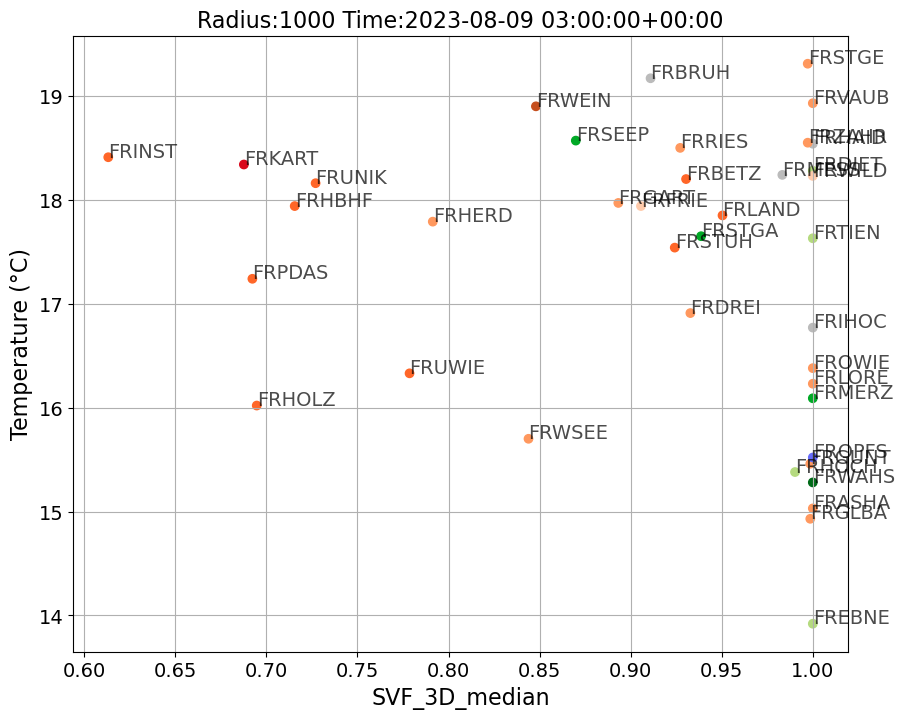

R² value for SVF_3D_median vs. 2023-08-09 03:00:00+00:00: 0.0521


In [66]:
plot_temp_pies(i,compass_angle,time=daytime,var='SVF_3D_median')

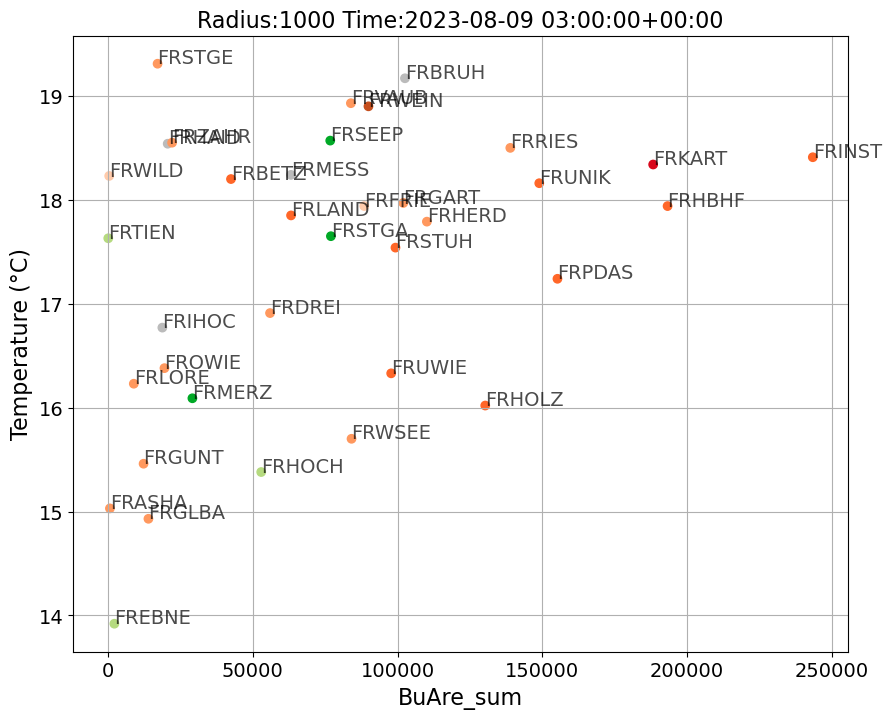

R² value for BuAre_sum vs. 2023-08-09 03:00:00+00:00: 0.1398


In [67]:
plot_temp_pies(i,compass_angle,time=daytime,var='BuAre_sum')

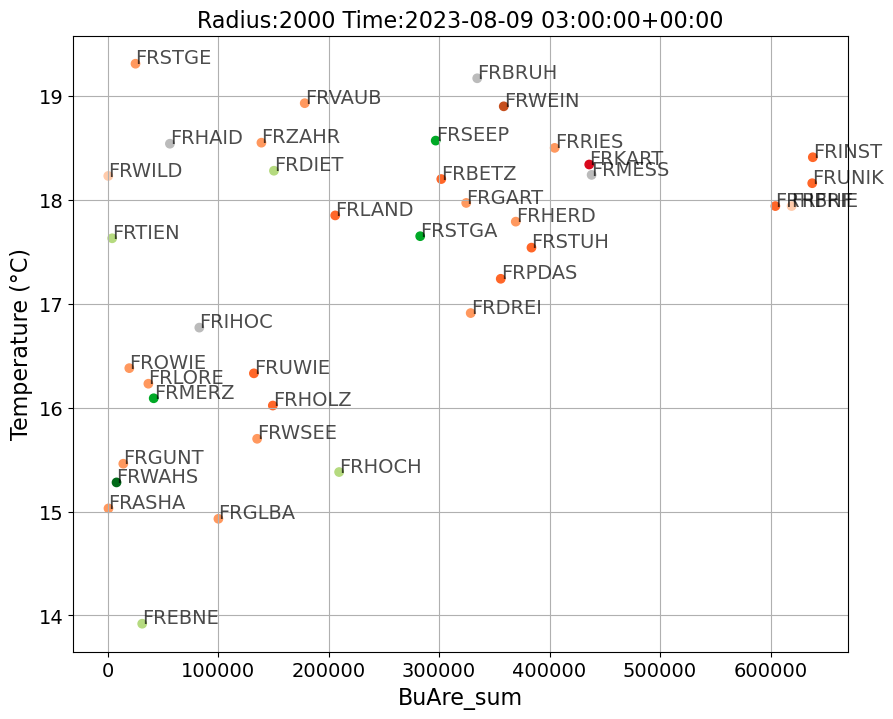

R² value for BuAre_sum vs. 2023-08-09 03:00:00+00:00: 0.2356


In [83]:
plot_temp_pies(i,compass_angle,time=daytime,var='BuAre_sum')

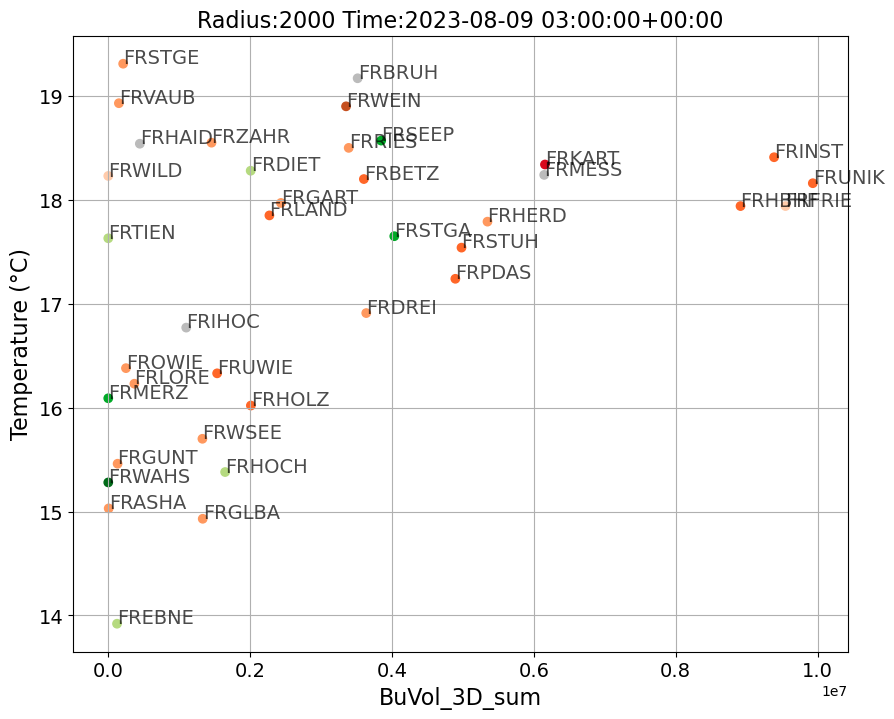

R² value for BuVol_3D_sum vs. 2023-08-09 03:00:00+00:00: 0.1695


In [59]:
plot_temp_pies(2000,compass_angle,time=daytime,var='BuVol_3D_sum')

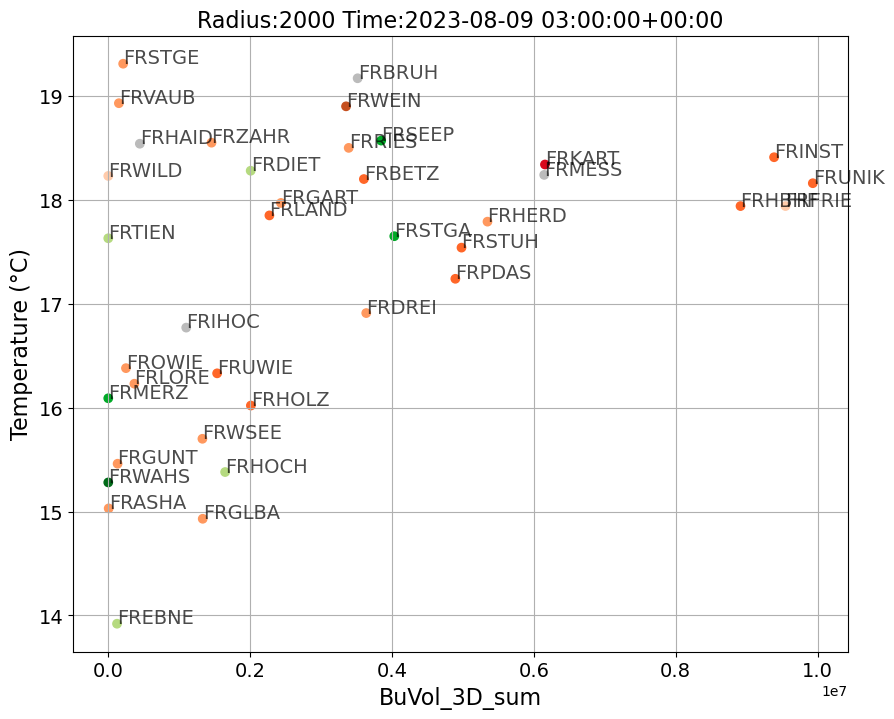

R² value for BuVol_3D_sum vs. 2023-08-09 03:00:00+00:00: 0.1695


In [84]:
plot_temp_pies(i,compass_angle,time=daytime,var='BuVol_3D_sum')

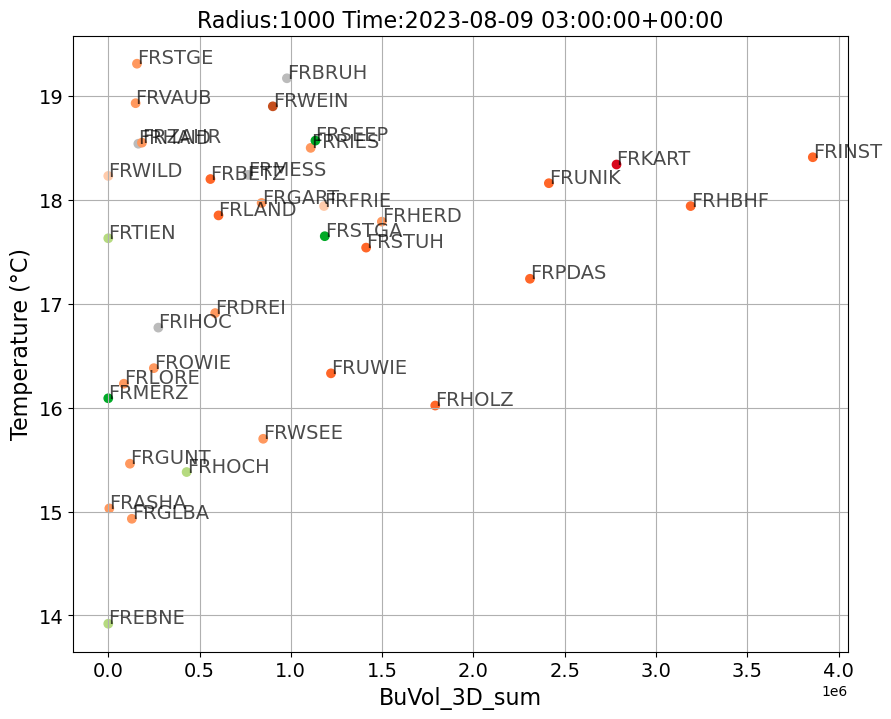

R² value for BuVol_3D_sum vs. 2023-08-09 03:00:00+00:00: 0.0899


In [50]:
plot_temp_pies(1000,compass_angle,time=daytime,var='BuVol_3D_sum')

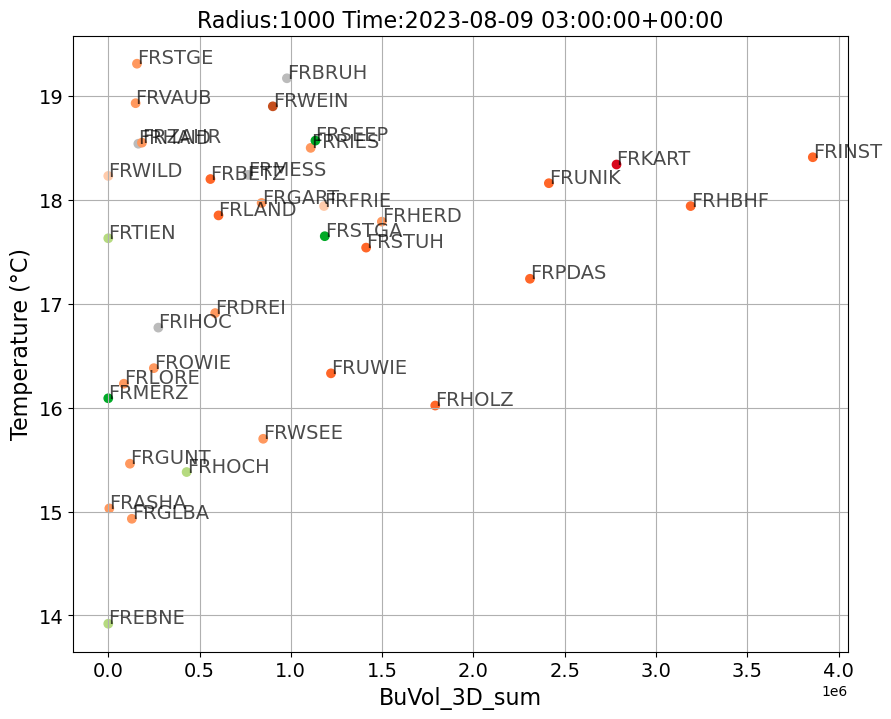

R² value for BuVol_3D_sum vs. 2023-08-09 03:00:00+00:00: 0.0899


In [68]:
plot_temp_pies(i,compass_angle,time=daytime,var='BuVol_3D_sum')

In [70]:
plot_temp_pies(i,compass_angle,time=daytime,var='StrHW_median')

R² value for StrHW_median vs. 2023-08-09 03:00:00+00:00: 0.0608


In [85]:
plot_temp_pies(i,compass_angle,time=daytime,var='StrHW_median')

R² value for StrHW_median vs. 2023-08-09 03:00:00+00:00: 0.0527


In [71]:
plot_temp_pies(i,compass_angle,time=daytime,var='BuAdj')

R² value for BuAdj vs. 2023-08-09 03:00:00+00:00: 0.0779


In [72]:
plot_temp_pies(i,compass_angle,time=daytime,var='BuHt_wmean')

R² value for BuHt_wmean vs. 2023-08-09 03:00:00+00:00: 0.0334


In [73]:
plot_temp_pies(i,compass_angle,time=daytime,var='BuHt_max')

R² value for BuHt_max vs. 2023-08-09 03:00:00+00:00: 0.1632


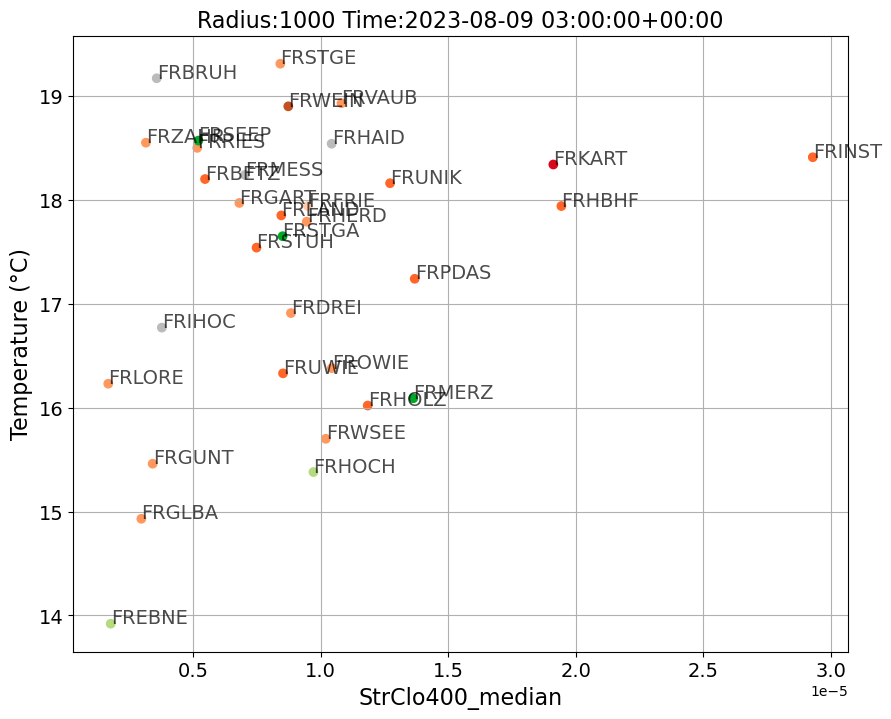

R² value for StrClo400_median vs. 2023-08-09 03:00:00+00:00: 0.0569


In [76]:
plot_temp_pies(i,compass_angle,time=daytime,var='StrClo400_median')

In [57]:
plt.figure(figsize=(10, 6))
#plt.ylim(19,22)
plot_temperature_vs_buvol3d(1000,200,time='2022-09-10 01:00:00+00:00',var='SVF_3D_median')

NameError: name 'plot_temperature_vs_buvol3d' is not defined

<Figure size 1000x600 with 0 Axes>

In [295]:
plt.figure(figsize=(10, 6))
#plt.ylim(19,22)
plot_temperature_vs_buvol3d(300,200,time='2022-09-10 01:00:00+00:00',var='BuVol_3D_sum')

            sky_view_factor     BuAdj      BuIBD   BuAre_mean  BuAre_median  \
station_id                                                                    
FRASHA                0.721  0.750000  15.115419   118.996460    120.419997   
FRBETZ                0.645  1.000000  31.385207   467.498569    409.394552   
FRBRUH                0.730  1.000000  56.639582   863.119985    781.650003   
FRDIET                0.868       NaN        NaN          NaN           NaN   
FRDREI                0.778  0.538462  31.927186   159.764154    148.546633   
FREBNE                0.897       NaN        NaN          NaN           NaN   
FREICH                0.687       NaN        NaN          NaN           NaN   
FRFRIE                0.762       NaN        NaN          NaN           NaN   
FRGART                0.799  0.106383  19.900546   138.634960     54.996293   
FRGLBA                0.475  0.846154  21.417200   133.634160    120.784580   
FRGUNT                0.620  0.600000  10.613244   1

R² value for BuVol_3D_sum vs. 2022-09-10 01:00:00+00:00: 0.1753


            sky_view_factor     BuAdj      BuIBD   BuAre_mean  BuAre_median  \
station_id                                                                    
FRASHA                0.721  0.750000  15.115419   118.996460    120.419997   
FRBETZ                0.645  1.000000  31.385207   467.498569    409.394552   
FRBRUH                0.730  1.000000  56.639582   863.119985    781.650003   
FRDIET                0.868       NaN        NaN          NaN           NaN   
FRDREI                0.778  0.538462  31.927186   159.764154    148.546633   
FREBNE                0.897       NaN        NaN          NaN           NaN   
FREICH                0.687       NaN        NaN          NaN           NaN   
FRFRIE                0.762       NaN        NaN          NaN           NaN   
FRGART                0.799  0.106383  19.900546   138.634960     54.996293   
FRGLBA                0.475  0.846154  21.417200   133.634160    120.784580   
FRGUNT                0.620  0.600000  10.613244   1

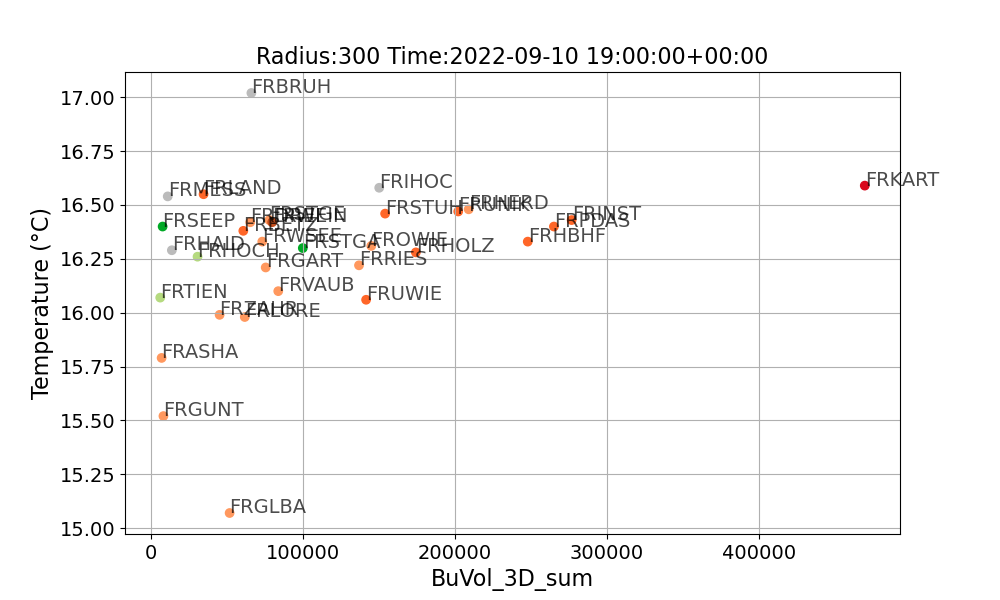

R² value for BuVol_3D_sum vs. 2022-09-10 19:00:00+00:00: 0.1081


In [296]:
plt.figure(figsize=(10, 6))
#plt.ylim(19,22)
plot_temperature_vs_buvol3d(300,200,time='2022-09-10 19:00:00+00:00',var='BuVol_3D_sum')

In [297]:
plt.figure(figsize=(10, 6))
plt.ylim(19,22)
plot_temperature_vs_buvol3d(1000,200,daytime,var='StrHW_median')    

            sky_view_factor     BuAdj       BuIBD   BuAre_mean  BuAre_median  \
station_id                                                                     
FRASHA                0.721  0.750000   15.115419   118.996460    120.419997   
FRBETZ                0.645  0.590627   26.640002   164.809513    122.744603   
FRBRUH                0.730  0.775194   36.809337   771.588995    325.892928   
FRDIET                0.868       NaN         NaN          NaN           NaN   
FRDREI                0.778  0.337968   23.630421   153.041366     61.772013   
FREBNE                0.897  1.000000  197.642966   142.494917    123.919663   
FREICH                0.687       NaN         NaN          NaN           NaN   
FRFRIE                0.762  0.363636   22.627472   606.643312    184.399796   
FRGART                0.799  0.590698   32.635373   399.312549    179.012117   
FRGLBA                0.475  0.813953   29.143836   198.889218    151.654292   
FRGUNT                0.620  0.666667  1

R² value for StrHW_median vs. 2022-09-10 13:00:00+00:00: 0.0232


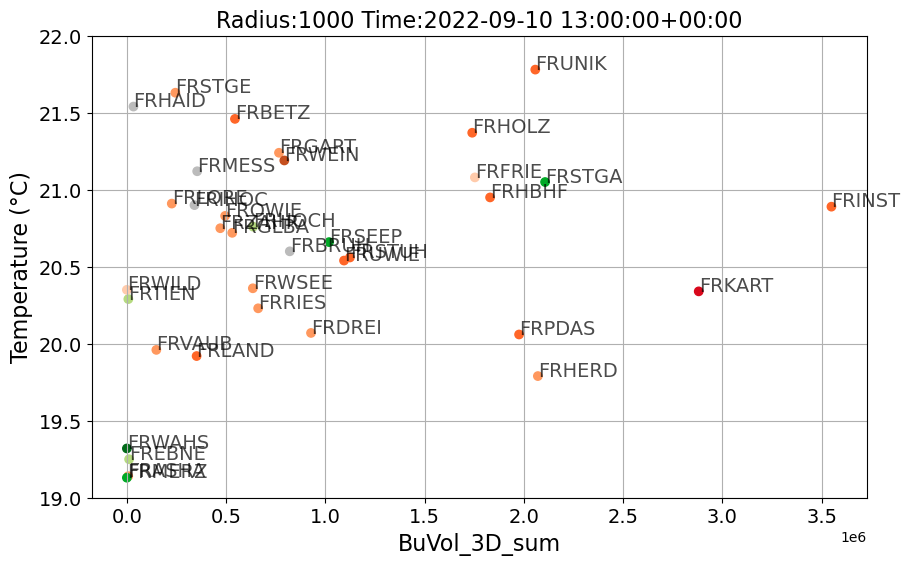

In [240]:
plt.figure(figsize=(10, 6))
plt.ylim(19,22)
plot_temperature_vs_buvol3d(1000,200,daytime,var='BuVol_3D_sum')

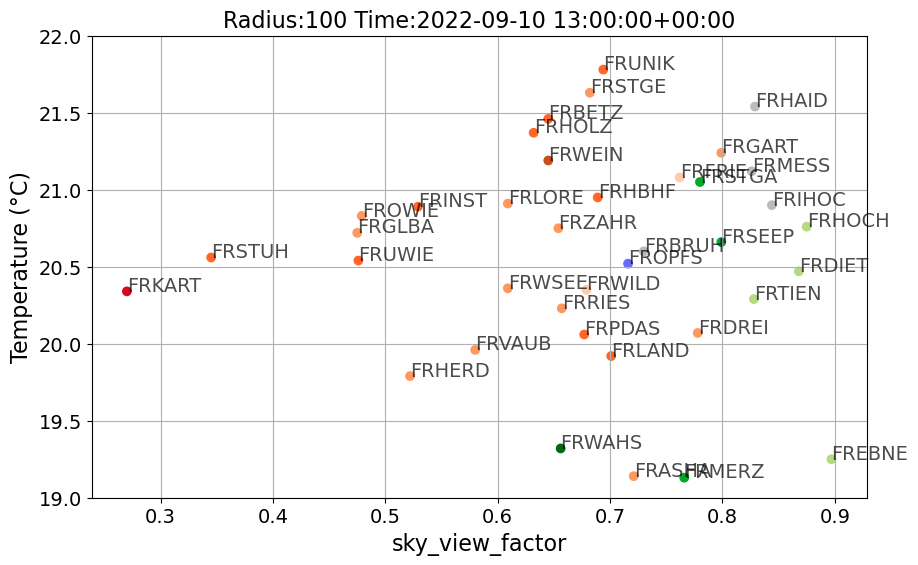

In [238]:
plt.figure(figsize=(10, 6))
plt.ylim(19,22)
plot_temperature_vs_buvol3d(100,200,daytime,var='sky_view_factor')

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_temperature_3d(radius1=1000,radius2=100,compass_angle=200,daytime=daytime,var1='BuVol_3D_sum',var2='sky_view_factor'):
    vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/pies/processed_station_params_' + str(radius1) + '_' + str(compass_angle) + 'deg.parquet')
    vars.index = vars['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry']
    vars = vars.drop(to_remove, axis=1)
    df = vars.merge(temp, left_on='station_id', right_on='station_id',how='inner')

    vars2 = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/pies/processed_station_params_' + str(radius2) + '_' + str(compass_angle) + 'deg.parquet')
    vars2.index = vars2['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry']
    vars2 = vars2.drop(to_remove, axis=1)
    df2 = vars2.merge(temp, left_on='station_id', right_on='station_id',how='inner')

    lcz_colors = vis.define_lcz_colors()
    df['colors'] = [lcz_colors[station] for station in df.index]

    print(df[var1], df2[var2], df[daytime])

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(df[var1], df2[var2], df[daytime], c=df['colors'], marker='o')
    ax.set_xlabel(var1, fontsize=16)
    ax.set_ylabel(var2, fontsize=16)
    ax.set_zlabel('Temperature (°C)', fontsize=16)

    # print r squared of multiple linear regression
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

    df_nona = df[[var1, var2,daytime]].dropna()
    X = df_nona[[var1, var2]]
    y = df_nona[daytime]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    print(f'R-squared: {r_squared:.2f}')



'''
    # in first 2 subplots plot temperature vs. BuVol3D_sum for daytime and nighttime
    plt.scatter(df[var], df[daytime], c=df['colors'])
    plt.title(f'Radius:{radius} Time:{daytime}', fontsize=16)
    plt.xlabel(var,fontsize=16)
    plt.ylabel('Temperature (°C)',fontsize=16)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=14)
    for i, txt in enumerate(df.index):
        plt.annotate(txt, (df[var].iloc[i], df[daytime].iloc[i]), fontsize=14, alpha=0.7)
'''




"\n    # in first 2 subplots plot temperature vs. BuVol3D_sum for daytime and nighttime\n    plt.scatter(df[var], df[daytime], c=df['colors'])\n    plt.title(f'Radius:{radius} Time:{daytime}', fontsize=16)\n    plt.xlabel(var,fontsize=16)\n    plt.ylabel('Temperature (°C)',fontsize=16)\n    plt.grid()\n    plt.tick_params(axis='both', which='major', labelsize=14)\n    for i, txt in enumerate(df.index):\n        plt.annotate(txt, (df[var].iloc[i], df[daytime].iloc[i]), fontsize=14, alpha=0.7)\n"

In [262]:
%matplotlib ipympl

station_id
FRASHA    6.878106e+03
FRBETZ    5.445075e+05
FRBRUH    8.207183e+05
FRDIET             NaN
FRDREI    9.276727e+05
FREBNE    1.111166e+04
FREICH             NaN
FRFRIE    1.753258e+06
FRGART    7.663688e+05
FRGLBA    5.307268e+05
FRGUNT    8.086915e+03
FRHAID    3.315885e+04
FRHBHF    1.829839e+06
FRHERD    2.070652e+06
FRHOCH    6.361996e+05
FRHOLZ    1.739867e+06
FRIHOC    3.405592e+05
FRINST    3.549668e+06
FRKART    2.881039e+06
FRLAND    3.513435e+05
FRLORE    2.261740e+05
FRMERZ    0.000000e+00
FRMESS    3.541936e+05
FROPFS             NaN
FROWIE    4.948875e+05
FRPDAS    1.975965e+06
FRRIES    6.613386e+05
FRSEEP    1.018627e+06
FRSTGA    2.106945e+06
FRSTGE    2.441986e+05
FRSTUH    1.123664e+06
FRTIEN    7.333172e+03
FRUNIK    2.057606e+06
FRUWIE    1.093989e+06
FRVAUB    1.483700e+05
FRWAHS    0.000000e+00
FRWEIN    7.932349e+05
FRWILD    0.000000e+00
FRWITT    0.000000e+00
FRWSEE    6.345388e+05
FRZAHR    4.705606e+05
Name: BuVol_3D_sum, dtype: float64 station_id


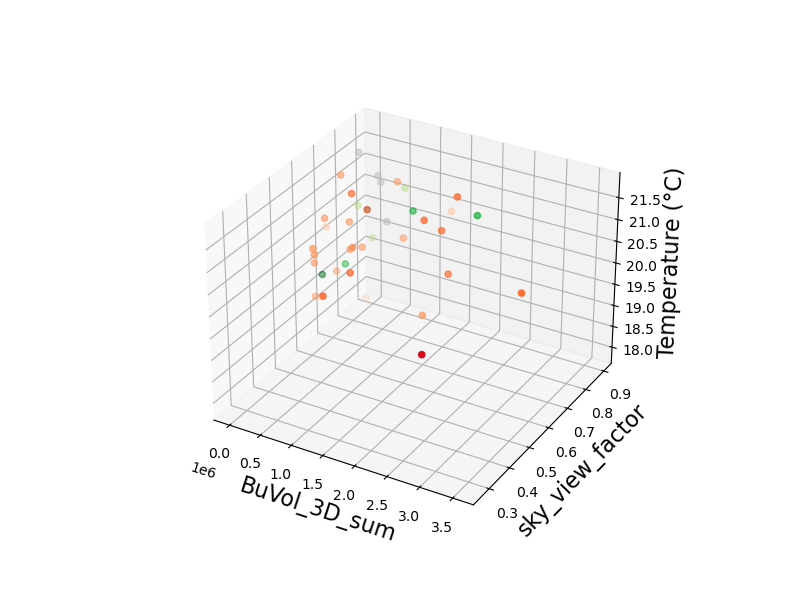

In [263]:
plot_temperature_3d(radius1=1000,radius2=100,compass_angle=200,daytime=daytime,var1='BuVol_3D_sum',var2='sky_view_factor')

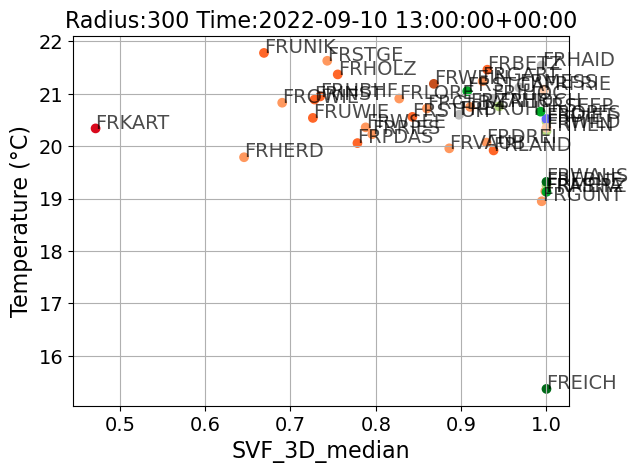

In [203]:
plot_temperature_vs_buvol3d(300,200,daytime,var='SVF_3D_median')

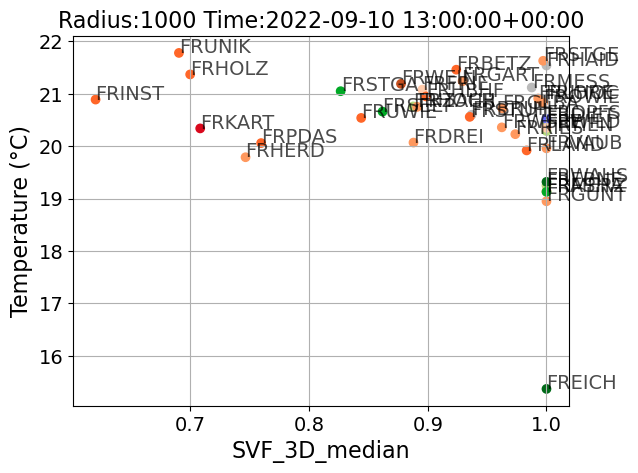

In [219]:
plot_temperature_vs_buvol3d(1000,200,daytime,var='SVF_3D_median')

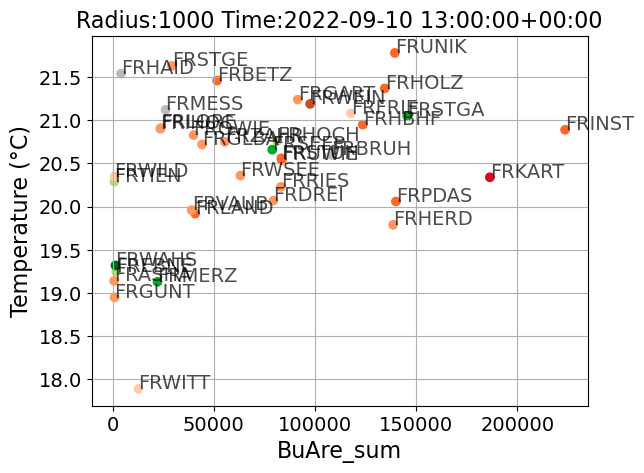

In [221]:
plot_temperature_vs_buvol3d(1000,200,daytime,var='BuAre_sum')

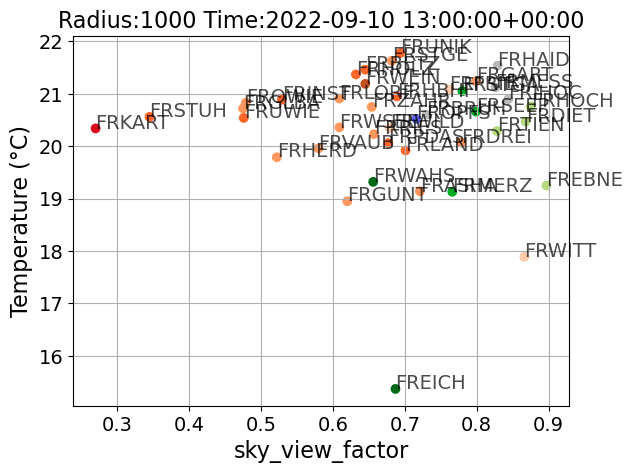

In [237]:
plot_temperature_vs_buvol3d(1000,200,daytime,var='sky_view_factor')

In [ ]:
#multivariate plot BuAre_sum and sky_view_factor

def plot_multivariate(radius, compass_angle, daytime):
    

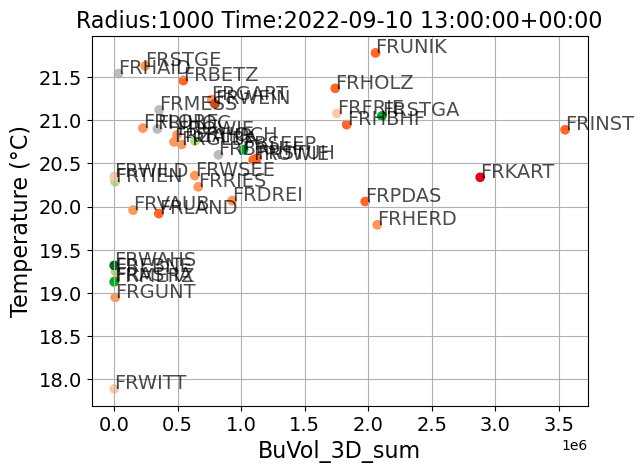

In [225]:
plot_temperature_vs_buvol3d(1000,200,daytime,var='BuVol_3D_sum')

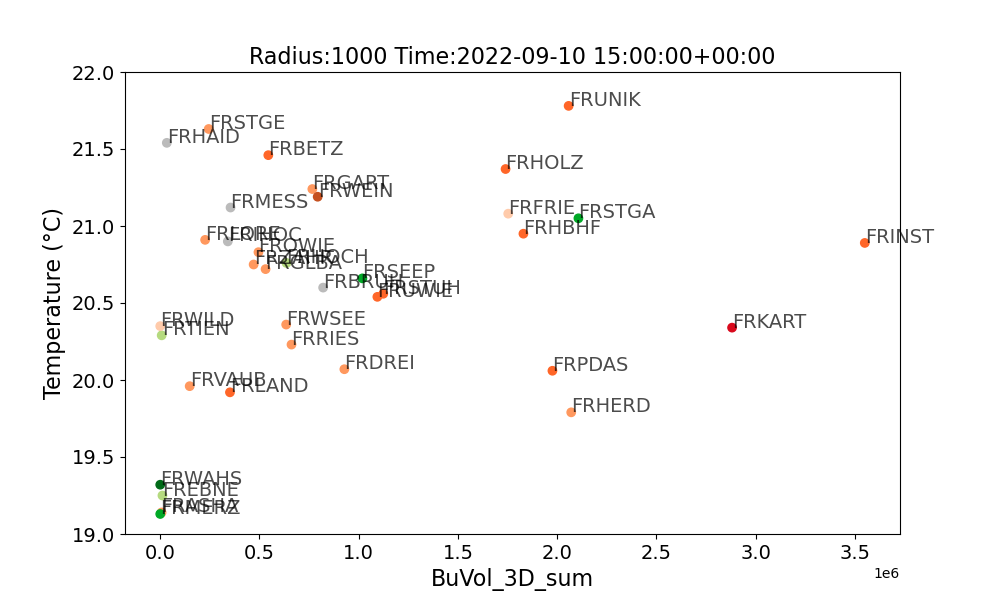

R² value for BuVol_3D_sum vs. 2022-09-10 15:00:00+00:00: 0.1536


In [274]:
plot_temperature_vs_buvol3d(1000,200,'2022-09-10 15:00:00+00:00',var='BuVol_3D_sum')

In [287]:
temp['2022-09-10 01:00:00+00:00']

station_id
FRASHA    16.18
FRBETZ    15.75
FRBRUH    16.36
FRDIET    15.27
FRDREI    16.30
FREBNE    15.20
FREICH    13.02
FRFRIE    15.82
FRGART    16.44
FRGLBA    15.07
FRGUNT    16.50
FRHAID    16.19
FRHBHF    16.37
FRHERD    16.47
FRHOCH    14.67
FRHOLZ    16.56
FRIHOC    15.15
FRINST    16.60
FRKART    16.77
FRLAND    15.30
FRLORE    16.50
FRMERZ    15.84
FRMESS    16.07
FROPFS    14.40
FROWIE    16.58
FRPDAS    16.67
FRRIES    16.00
FRSEEP    15.76
FRSTGA    15.99
FRSTGE    16.48
FRSTUH    16.59
FRTIEN    16.22
FRUNIK    16.27
FRUWIE    16.52
FRVAUB    16.90
FRWAHS    15.71
FRWEIN    15.95
FRWILD    14.62
FRWITT    15.20
FRWSEE    16.48
FRZAHR    15.48
Name: 2022-09-10 01:00:00+00:00, dtype: float64

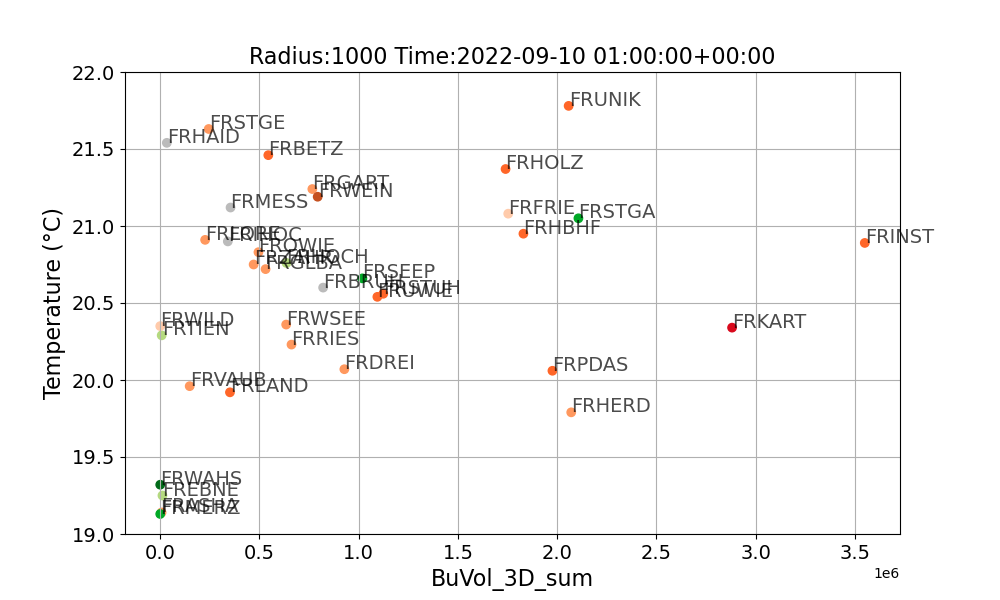

R² value for BuVol_3D_sum vs. 2022-09-10 01:00:00+00:00: 0.1631


In [285]:
plot_temperature_vs_buvol3d(1000,200,time='2022-09-10 01:00:00+00:00',var='BuVol_3D_sum')

In [226]:
plot_temperature_vs_buvol3d(1000,200,daytime,var='BuAdj')

In [ ]:
plot_temperature_vs_buvol3d(1000,200,daytime,var='BuAre_sum')

In [220]:
plot_temperature_vs_buvol3d(300,200,daytime,var='BuAre_sum')

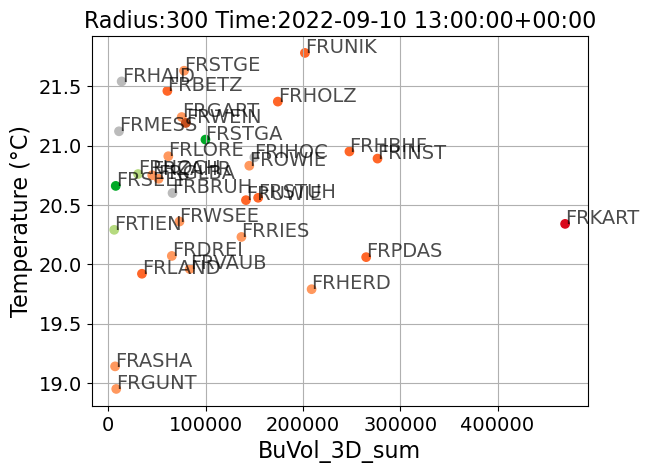

In [205]:
plot_temperature_vs_buvol3d(300,200,daytime,var='BuVol_3D_sum')

In [206]:
plot_temperature_vs_buvol3d(300,200,daytime,var='StrHW_median')

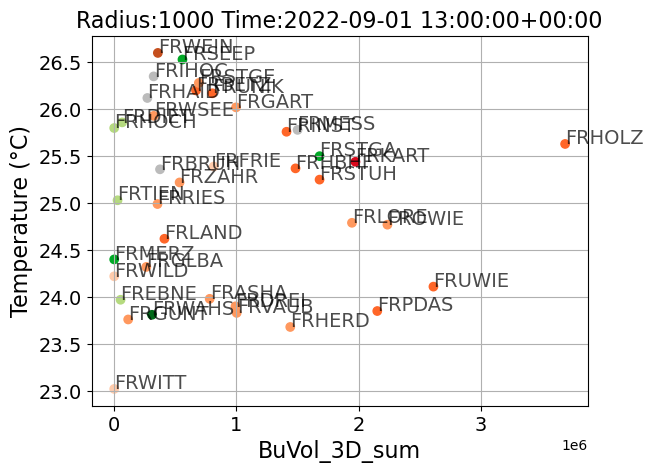

In [108]:
plot_temperature_vs_buvol3d(1000,daytime,var='BuVol_3D_sum')

In [109]:
plot_temperature_vs_buvol3d(1000,daytime,var='StrHW_median')

In [112]:
plot_temperature_vs_buvol3d(1000,daytime,var='SVF_3D_mean')

In [130]:
# Compass angle 135 deg

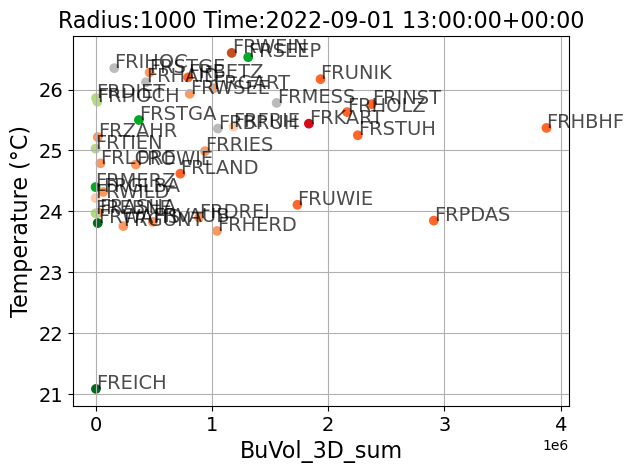

In [136]:
plot_temperature_vs_buvol3d(1000,daytime,var='BuVol_3D_sum')

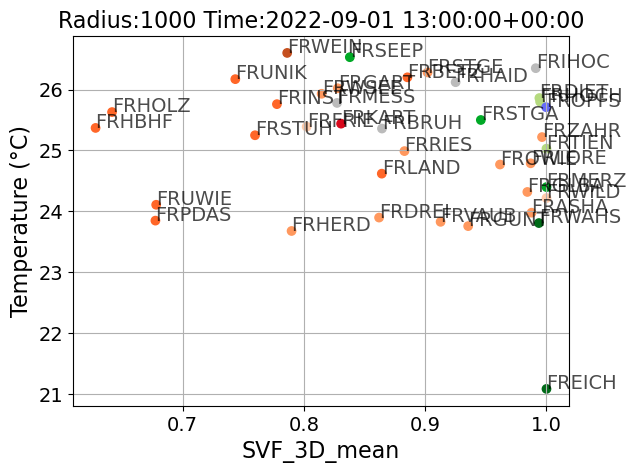

In [137]:
plot_temperature_vs_buvol3d(1000,daytime,var='SVF_3D_mean')

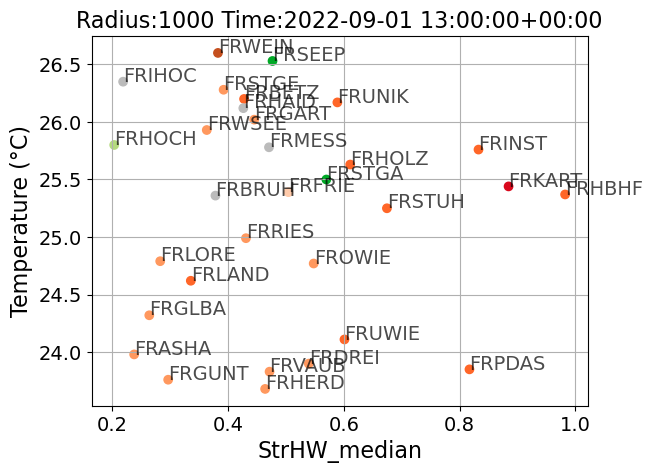

In [138]:
plot_temperature_vs_buvol3d(1000,daytime,var='StrHW_median')

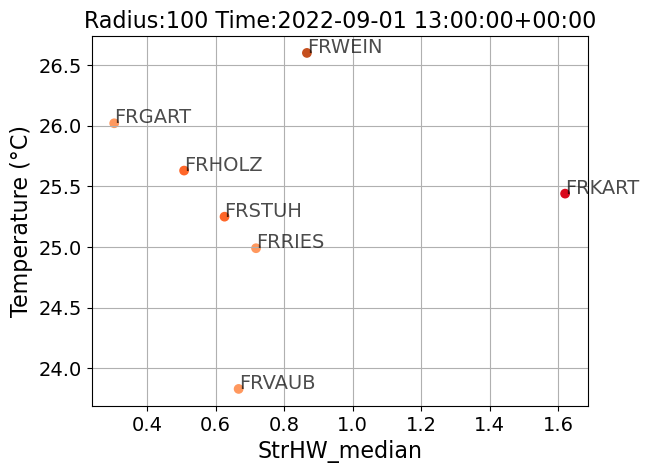

In [151]:
plot_temperature_vs_buvol3d(100,6,daytime,var='StrHW_median')

In [152]:
plot_temperature_vs_buvol3d(100,6,daytime,var='BuVol_3D_sum')

In [154]:
plot_temperature_vs_buvol3d(100,6,daytime,var='SVF_3D_mean')

In [161]:
plot_temperature_vs_buvol3d(100,135,daytime,var='BuVol_3D_sum')

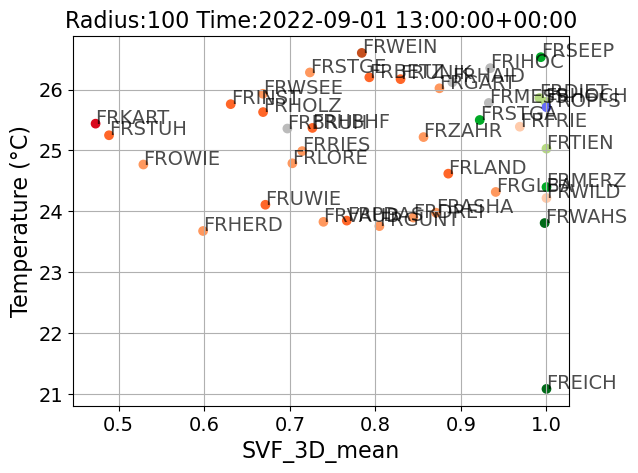

In [162]:
plot_temperature_vs_buvol3d(100,135,daytime,var='SVF_3D_mean')